In [17]:
# %% Short demo of using xarray for mixed datasets
import zarr
import xarray as xr
import pandas as pd
import numpy as np
from numcodecs import GZip
import skimage
import matplotlib.pyplot as plt

spatiomolecular_matrix = pd.read_csv("../spatiomolecular_matrix.csv")
spots_reduced = pd.read_csv("../spots_reduced.csv")
string_list = spots_reduced["target"]
spots_reduced_indexed = spots_reduced.set_index(["x","y"])

data = skimage.data.astronaut()
data = np.random.rand(2048).astype("float32")

data = skimage.data.binary_blobs(
    length=2048, blob_size_fraction=0.1, n_dim=2, volume_fraction=0.5, seed=None)

xr_data = xr.DataArray(data,coords={"x":np.arange(0,2048), "y":np.arange(0,2048)})


In [18]:
# %% Flatten data
flat_image = xr_data.to_pandas().unstack().rename("Intensity")


In [19]:
#  %% Join
df = spots_reduced_indexed.join(flat_image,how="right")


In [20]:
xr_df = df.to_xarray()
# %% Save zarr
# xr_df.to_zarr("temp2",mode="w",compute=False)


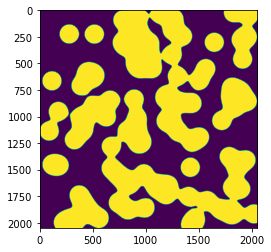

In [21]:
#  %% Get the full image back

image_plane = xr_df.isel(x=slice(0, None), y=slice(0, None))["Intensity"]
plt.imshow(image_plane)
plt.show()


In [28]:

# %% Get tabular data
spot_ids = xr_df["spot_id"].to_series().dropna();spot_ids

# %%


x     y   
0     952     2963.0
      1032    2665.0
      1494     831.0
      2027    4157.0
2     565     4779.0
               ...  
2046  1384    1117.0
2047  656     4656.0
      695     4553.0
      1039    2644.0
      1394    1094.0
Name: spot_id, Length: 3408, dtype: float64

In [29]:
flat_image = xr_data.to_pandas().unstack().rename("Intensity");flat_image


y     x   
0     0       False
      1       False
      2       False
      3       False
      4       False
              ...  
2047  2043    False
      2044    False
      2045    False
      2046    False
      2047    False
Name: Intensity, Length: 4194304, dtype: bool

In [24]:
#  %%
df = spots_reduced_indexed.join(flat_image,how="right")
xr_df = df.to_xarray();xr_df


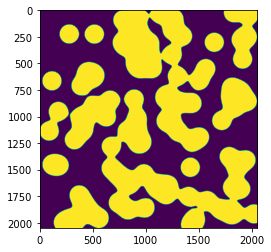

In [25]:
# %% Save zarr
# xr_df.to_zarr("temp2",mode="w",compute=False)
#  %% Get the full image back

image_plane = xr_df.isel(x=slice(0, None), y=slice(0, None))["Intensity"]
plt.imshow(image_plane)
plt.show()


In [27]:

# %% Get tabular data
spot_ids = xr_df["spot_id"].to_series().dropna();spot_ids

# %%


x     y   
0     952     2963.0
      1032    2665.0
      1494     831.0
      2027    4157.0
2     565     4779.0
               ...  
2046  1384    1117.0
2047  656     4656.0
      695     4553.0
      1039    2644.0
      1394    1094.0
Name: spot_id, Length: 3408, dtype: float64